# 1) 데이터 읽기

In [147]:
import pandas as pd

df = pd.read_csv('./diabetes.csv')

df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [148]:
# "Outcome" 항목 삭제
df = df.drop('Outcome', axis = 1)

df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


# 2) 결측치 확인

In [149]:
# 결측치 확인
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

# 3) 상관 관계 행렬 확인하기

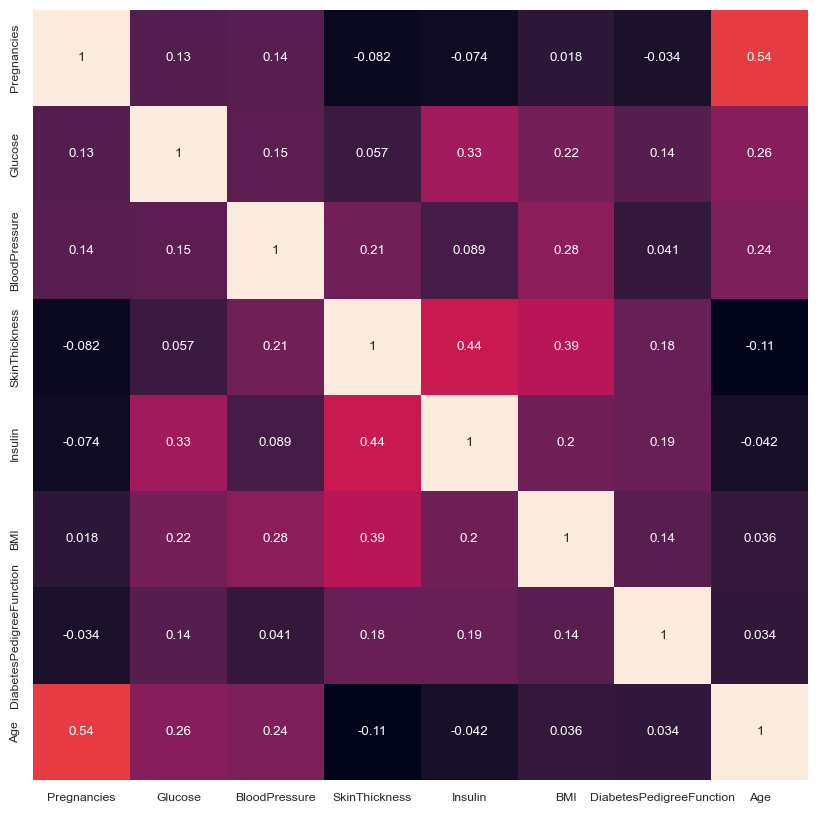

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns

# 0.3 이상인 경우 상관관계가 있고, 0.7이상이면 아주 높음

df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

# BMI와 가장 높은 상관관계를 가진 feature : SkinThickness

# 4) X, Y 나누기

In [151]:
X = df.drop('BMI', axis = 1)
Y = df['BMI']

print(X.head())
print()
print(Y.value_counts())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  \
0            6      148             72             35        0   
1            1       85             66             29        0   
2            8      183             64              0        0   
3            1       89             66             23       94   
4            0      137             40             35      168   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  

BMI
32.0    13
31.6    12
31.2    12
0.0     11
32.4    10
        ..
36.7     1
41.8     1
42.6     1
42.8     1
46.3     1
Name: count, Length: 248, dtype: int64


# 5) 데이터 스케일링

In [152]:
from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler


scaler = StandardScaler()
X_scaled_data = scaler.fit_transform(X)

X = pd.DataFrame(X_scaled_data,
                            index = X.index,
                            columns = X.columns) 

X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,5.484909,-0.020496
...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,-0.908682,2.532136
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,-0.398282,-0.531023
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.685193,-0.275760
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.371101,1.170732


# 6) One-Hot 인코딩

In [153]:
Y = pd.get_dummies(Y).values

Y

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

# 7) Train데이터, Test데이터 나누기

In [154]:
# split X_train, Y_train, X_test, Y_test
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

# 8) 딥러닝 모델 정의

## 1. 함수형으로 변환

In [155]:
# 신경망 모델 구축
from keras import Input
from keras import Model
from keras.layers import Dense
from keras.optimizers import Adam

inputs = Input(shape =(7, ))
layer0 = Dense(16, activation = "relu")(inputs)
layer1 = Dense(16, activation = "relu")(layer0)
prediction = Dense(1)(layer1)

model = Model(inputs = inputs, outputs = prediction)

model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

Model: "functional_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)     │ (None, 7)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 16)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 417 (1.63 KB)

 Trainable params: 417 (1.63 KB)

 Non-trainable params: 0 (0.00 B)

# 9) 학습, 예측

In [156]:
import numpy as np

model_history=model.fit(x=X_train, y=Y_train, epochs=30, batch_size=32,validation_data= (X_test,Y_test))
y_pred = model.predict(X_test)

# 확률에 가장 가까운 정수로 class를 예측
y_pred_class = np.argmax(y_pred,axis=1)

# y_pred_class one-hot-encoding
Y_pred_class = pd.get_dummies(y_pred_class).values

Epoch 1/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.1061 - mse: 0.1061 - val_loss: 0.0429 - val_mse: 0.0429
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0236 - val_mse: 0.0236
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0259 - mse: 0.0259 - val_loss: 0.0159 - val_mse: 0.0159
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0166 - mse: 0.0166 - val_loss: 0.0127 - val_mse: 0.0127
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0122 - mse: 0.0122 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0103 - mse: 0.0103 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0090 - mse: 0.0090 - val_loss: 0.0083 - val_mse: 0.0083
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 9/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0070 - mse:

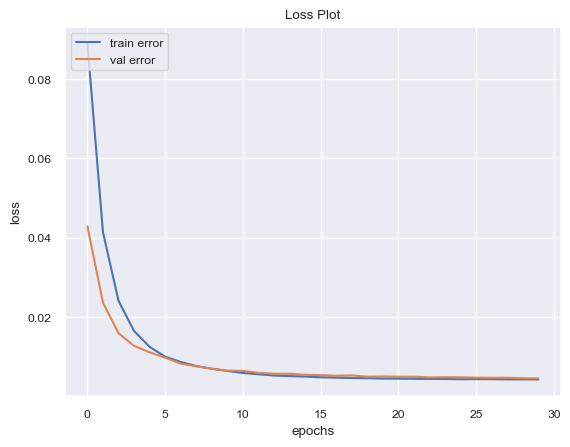

In [157]:
# 훈련 데이터의 손실값과 검증 데이터의 손실값을 그래프에 출력
history_dict = model_history.history
loss_values = history_dict['loss']
val_loss_value = history_dict['val_loss']
acc = history_dict['mse']
epochs = range(1, len(acc) + 1)

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Loss Plot')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train error', 'val error'], loc = 'upper left')
plt.show()

In [158]:
model.evaluate(X_test, Y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0046 - mse: 0.0046 


[0.004538226407021284, 0.004538226407021284]

의문점 : BMI는 연속적인 값이다. One-Hot Encoding은 class 사이에 관계를 없게 하기 위해 해주는 작업으로 알고 있는데, BMI 3.0과 4.3은 관계가 있지 않은가? 싶었지만 One-Hot Encoding을 했을 때, mse가 현저히 줄어듦을 확인했다.

연속적인 값을 Regression할 경우에도 One-Hot Encoding을 해주는 이유는 무엇인가?